In [1]:
import numpy as np
import matplotlib.pyplot as plt
import RestrictedBoltzmannMachine as RBM

(60000, 784)


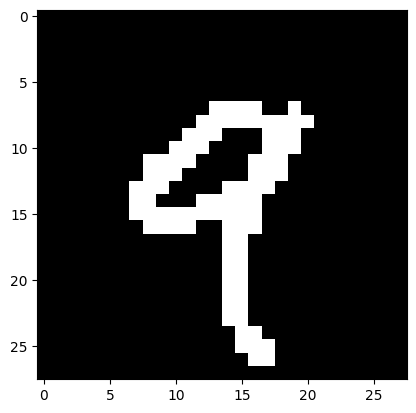

In [2]:
data = None
with open("train-images.idx3-ubyte", "rb") as f:
    data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

data = (data > 128).astype(np.uint8)
print(data.shape)

img = data[4].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image

In [3]:

W = np.random.rand(28*28, 28*28)
visible_biases = np.random.rand(28 * 28, 1)
hidden_biases = np.random.rand(28 * 28, 1)
my_rbm = RBM.RestrictedBoltzmannMachine(visible_biases, hidden_biases, W)

In [4]:
my_rbm.contrastive_divergence(data)

100
Epoch: 0
614656
30.037578691840125
learning_rate: 0.01
30.037578691840125
Epoch: 1
614656
0.4126589346325743
learning_rate: 0.01
0.4126589346325743
Epoch: 2
614656
0.13152678452443467
learning_rate: 0.01
0.13152678452443467
Epoch: 3
614656
0.11657639893020136
learning_rate: 0.01
0.11657639893020136
Epoch: 4
614656
0.4601726764654655
learning_rate: 0.01
0.4601726764654655
Epoch: 5
614656
0.0740368539509821
learning_rate: 0.01
0.0740368539509821
Epoch: 6
614656
0.07293605993216498
learning_rate: 0.01
0.07293605993216498
Epoch: 7
614656
0.06995623584536466
learning_rate: 0.01
0.06995623584536466
Epoch: 8
614656
0.047655752363608216
learning_rate: 0.01
0.047655752363608216
Epoch: 9
614656
0.05789325278198924
learning_rate: 0.01
0.05789325278198924
Epoch: 10
614656
0.05903041425104839
learning_rate: 0.01
0.05903041425104839
Epoch: 11
614656
0.0381811345597196
learning_rate: 0.01
0.0381811345597196
Epoch: 12
614656
0.077486848179398
learning_rate: 0.01
0.077486848179398
Epoch: 13
614656


KeyboardInterrupt: 

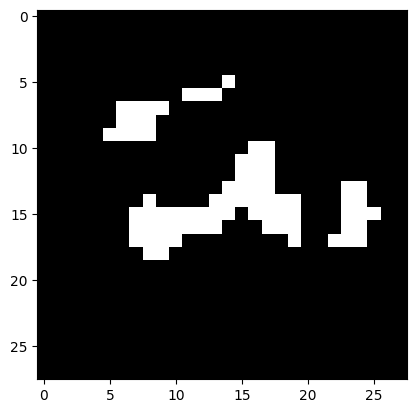

In [8]:
out = my_rbm.gibbs_sample_v(np.random.rand(28*28, 1), 100)
out = out.astype(np.uint8)
out = out * 253
img = out.reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image

In [1]:


import RestrictedBoltzmannMachine as RBM
data2 = None
with open("t10k-images.idx3-ubyte", "rb") as f:
    data2 = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

data2 = (data2 > 128).astype(np.uint8)

myin = data[np.random.randint(0,60000)]
inimg = myin.reshape(28,28).copy()
plt.imshow(inimg, cmap='gray')
plt.show()
inimg[14:, :] = 0
plt.imshow(inimg, cmap='gray')
plt.show()

out = my_rbm.gibbs_sample_v(np.matrix(inimg.reshape(1, 28*28)).T, 100)
for i in range(0, 100):
    out += my_rbm.gibbs_sample_v(np.matrix(inimg.reshape(1, 28*28)).T, 100)

out = out.astype(np.uint8)
img = out.reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image

NameError: name 'np' is not defined

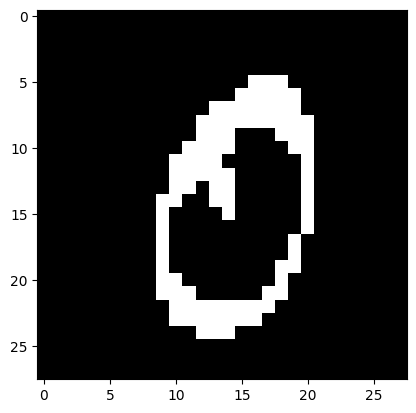

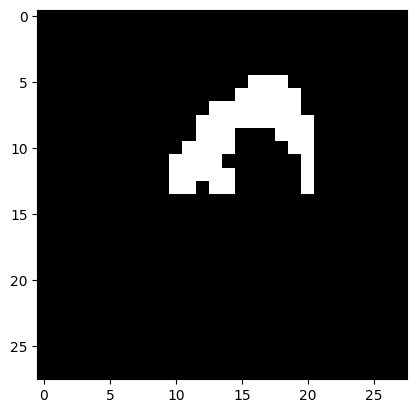

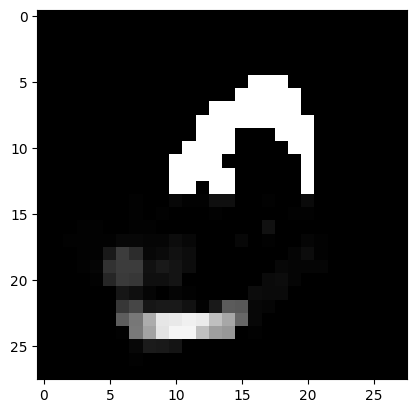

In [30]:
data2 = None
with open("t10k-images.idx3-ubyte", "rb") as f:
    data2 = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

data2 = (data2 > 128).astype(np.uint8)

myin = data[np.random.randint(0,60000)]
inimg = myin.reshape(28,28).copy()
plt.imshow(inimg, cmap='gray')
plt.show()
inimg[14:, :] = 0
plt.imshow(inimg, cmap='gray')
plt.show()

out = my_rbm.conditional_gibbs_sample(np.matrix(inimg.reshape(1, 28*28)).T, 1)
for i in range(0, 100):
    out += my_rbm.conditional_gibbs_sample(np.matrix(inimg.reshape(1, 28*28)).T, 100)

out = out.astype(np.uint8)
img = out.reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image